In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime as dt
import seaborn as sns

In [39]:


xls =r'C:\Users\yfird\OneDrive\Desktop\KPMG VIRTUAL INTERNSHIP\KPMG_VI_New_raw_data_update_final.xlsx'
data=pd.read_excel(xls,sheet_name='Transactions')
df1=pd.read_excel(xls,sheet_name='NewCustomerList')
df2=pd.read_excel(xls,sheet_name='CustomerDemographic')
df3=pd.read_excel(xls,sheet_name='CustomerAddress')

In [40]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data.describe

<bound method NDFrame.describe of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1

In [42]:
data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [43]:
data.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
Unnamed: 13                 True
Unnamed: 14                 True
Unnamed: 15                 True
Unnamed: 16                 True
Unnamed: 17                 True
Unnamed: 18                 True
Unnamed: 19                 True
Unnamed: 20                 True
Unnamed: 21                 True
Unnamed: 22                 True
Unnamed: 23                 True
Unnamed: 24                 True
Unnamed: 25                 True
dtype: bool

In [44]:
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)
df=data
print(df.columns)


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')


In [45]:
df.isnull().any().sum()

7

In [46]:
#Data profiling
#number of missing data
#mean values
#mode values
#

In [47]:
df.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
dtype: bool

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [49]:
df.dropna()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [51]:
df.isnull().values.sum()

1542

In [52]:
df.dropna(axis=0,inplace=True)

In [53]:
df.duplicated().sum()

0

In [54]:
df.shape

(19445, 13)

In [55]:
df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [56]:
df['product_id'].astype(int)

0         2
1         3
2        37
3        88
4        78
         ..
19995    51
19996    41
19997    87
19998     6
19999    11
Name: product_id, Length: 19445, dtype: int32

In [57]:
df['brand'].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

check spelling error

In [58]:
df['online_order'].value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

In [59]:
df['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [60]:
df['product_class'].value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [61]:
df['product_size'].value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [62]:
df['product_line'].value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [63]:
[#check distribution 
#check outliers
#date transaction
]

[]

<AxesSubplot:>

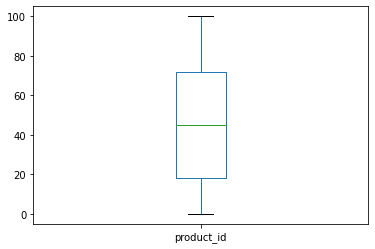

In [64]:
df['product_id'].plot(kind='box')

<AxesSubplot:>

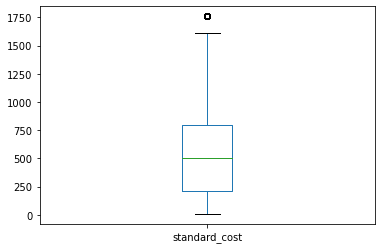

In [65]:
df['standard_cost'].plot(kind='box')

In [66]:
#print(np.where(df['standard_cost']>1600))

In [67]:
z=np.abs(stats.zscore(df['customer_id']))
threshold=3
zs=np.where(z>3)
zs

(array([ 8478, 16232, 16977], dtype=int64),)

In [68]:
#format first sold date
df['product_first_sold_date']=pd.TimedeltaIndex(df['product_first_sold_date'],unit='d') + dt.datetime(1900,1,1)
df['product_first_sold_date'].head()

0   2012-12-04
1   2014-03-05
2   1999-07-22
3   1998-12-18
4   2015-08-12
Name: product_first_sold_date, dtype: datetime64[ns]

In [69]:
df['product_first_sold_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2004-08-04 18:12:27.585497472
min                1991-01-23 00:00:00
25%                1997-08-27 00:00:00
50%                2004-08-19 00:00:00
75%                2011-05-11 00:00:00
max                2016-12-08 00:00:00
Name: product_first_sold_date, dtype: object

In [70]:
#categorical viz

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [102]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


In [103]:
df.to_csv('Transaction clean.csv')

In [71]:
df1.drop(df1.filter(regex="Unnamed"),axis=1, inplace=True)
df2.drop(df2.filter(regex="Unnamed"),axis=1, inplace=True)
df3.drop(df3.filter(regex="Unnamed"),axis=1, inplace=True)

CUSTOMER LIST 

In [72]:
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


<AxesSubplot:>

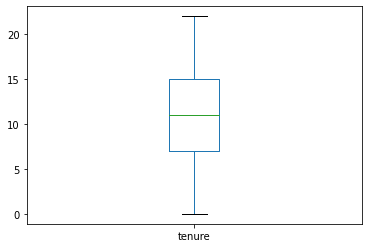

In [74]:
df1['tenure'].plot(kind='box')

<AxesSubplot:>

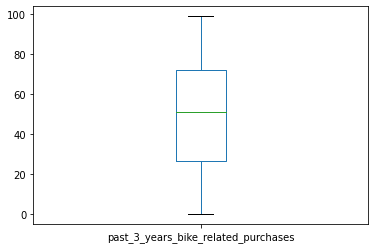

In [76]:
df1['past_3_years_bike_related_purchases'].plot(kind='box')

In [111]:
df1.isnull().any()

first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                 False
address                                False
postcode                               False
state                                  False
country                                False
property_valuation                     False
Rank                                   False
Value                                  False
age                                     True
dtype: bool

In [110]:
df1['job_title'].dropna(axis=0,inplace=True)
df1['last_name'].dropna(axis=0,inplace=True)
df1['job_industry_category'].dropna(axis=0,inplace=True)

In [80]:
df1['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [108]:
df1['DOB'].fillna(df1['DOB'].mean())

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 1000, dtype: datetime64[ns]

In [81]:
df1['gender'].replace('U','Unknown',inplace=True)
df1['deceased_indicator'].replace('N','NO',inplace=True)


In [82]:
df1.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [83]:
df1.astype({'first_name':'str','last_name':"str",'gender':'str','deceased_indicator':'str','job_title':'str','job_industry_category':'str',
'wealth_segment':'str','owns_car':'str','state':'str','country':'str'
})

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,NO,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,NO,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,NO,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,NO,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,NO,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,NO,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,NO,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,NO,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,NO,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [84]:
df1['deceased_indicator'].value_counts()

NO    1000
Name: deceased_indicator, dtype: int64

In [85]:
df1['country'].value_counts()

Australia    1000
Name: country, dtype: int64

In [86]:
df1['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [87]:
df1['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [88]:
df1['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [89]:
df1.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [112]:
df1.shape

(1000, 19)

In [113]:
df1.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
age                         

In [131]:
df1['DOB'].dropna(axis=0,inplace=True)
df1['job_industry_category'].dropna(axis=0,inplace=True)
df1['job_title'].dropna(axis=0,inplace=True)

In [115]:
import datetime
df1['age']=(dt.datetime.now()-df1['DOB'])/np.timedelta64(1,'Y')
df1['age']=(round(df1['age']/10)*10).astype(int,errors='ignore')
df1['age'].head()

0    60.0
1    50.0
2    50.0
3    40.0
4    60.0
Name: age, dtype: float64

In [132]:
df1.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,NO,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374,60.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,NO,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357,20.0
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,NO,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357,70.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,NO,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357,70.0
999,Sylas,Duffill,Male,56,1955-10-02,Staff Accountant IV,Property,Mass Customer,NO,Yes,14,21875 Grover Drive,2010,NSW,Australia,9,1000,0.340,70.0


In [128]:
df1['last_name'].replace('NaN','Not Known')

0        Brister
1         Genery
2      Forrester
3          Stutt
4         Hadlee
         ...    
995    Romanetti
996      Wortley
997        Temby
998      Cubbini
999      Duffill
Name: last_name, Length: 1000, dtype: object

In [147]:
df1[df1['job_industry_category'].isna()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,NO,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,20.0
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,NO,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,40.0
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,NO,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,40.0
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,NO,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,50.0
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,NO,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,NO,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,60.0
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,NO,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,20.0
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,NO,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,50.0
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,NO,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,30.0


In [141]:
print(df1['job_industry_category'].unique())

['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']


In [148]:
df1.loc[df1['job_title']=='Quality Control Specialist']

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,NO,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,40.0
257,Malvin,Ryhorovich,Male,37,1962-03-03,Quality Control Specialist,NaN,Mass Customer,NO,No,5,5356 Sugar Plaza,4818,QLD,Australia,3,252,1.073125,60.0
283,Dexter,Shutle,Male,81,1959-01-05,Quality Control Specialist,NaN,Mass Customer,NO,No,17,07 Dayton Court,4005,QLD,Australia,7,284,1.046875,60.0
389,Fara,Sarath,Female,75,1948-06-30,Quality Control Specialist,NaN,Mass Customer,NO,No,22,540 Forest Run Plaza,2168,NSW,Australia,7,386,0.945625,70.0
754,Glenda,Eliet,Female,87,1974-06-17,Quality Control Specialist,NaN,Mass Customer,NO,No,12,1 Fordem Way,3844,VIC,Australia,7,755,0.640000,50.0
983,Augusta,Munns,Female,5,1951-09-17,Quality Control Specialist,NaN,Mass Customer,NO,No,21,607 Memorial Avenue,2074,NSW,Australia,11,983,0.410000,70.0
988,Vyky,Pegg,Female,64,1943-03-15,Quality Control Specialist,Manufacturing,Mass Customer,NO,Yes,11,31854 Anniversary Terrace,2322,NSW,Australia,7,988,0.399500,80.0


In [ ]:
#if jobtitle of missing vlaue= job tile of another, replace with mode job_industry category

In [146]:
if df1['job_industry_category'].empty and df1['job_title']=='Nurse':
    df1['job_industry_category'].replace('NaN','Health')

In [99]:
df1.duplicated().any()

False

In [100]:
df1['age'].max()

80.0